Beata Sirowy
# Apache Kafka basics
Based on the IBM Data Engineering Professional Certificate, _ETL and Data Pipelines with Shell, Airflow and Kafka_  <br> Images' copyright: IBM Skills Network 

## An overview


Apache Kafka is an open source project which has become the most popular ESP.


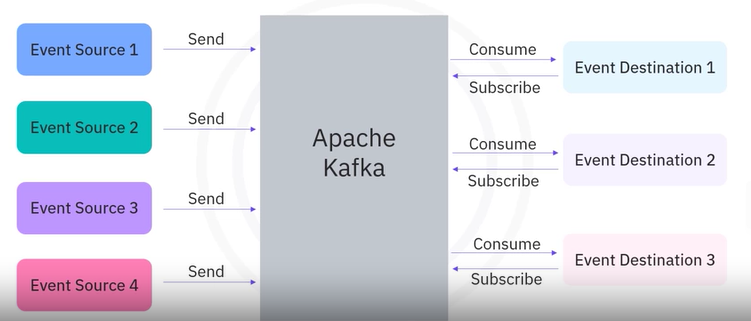

Kafka is a comprehensive platform and can be used in many application scenarios.

It was originally used to track user activities such as keyboard strokes,
mouse clicks, page views, searches, gestures, screen time, and so on.

Kafka is also suitable for: 
- all kinds of metric streaming such as
sensor readings, GPS, and hardware and software monitoring.
- enterprise applications and infrastructure with a huge number of logs:
Kafka can be used to collect and integrate them into a centralized repository.
- banks, insurance, or fintech companies: Kafka is widely used for
payments and transactions.
- many other contexts: you can use Kafka when you want high throughput and reliable data
transportation services among various event sources and destinations. 


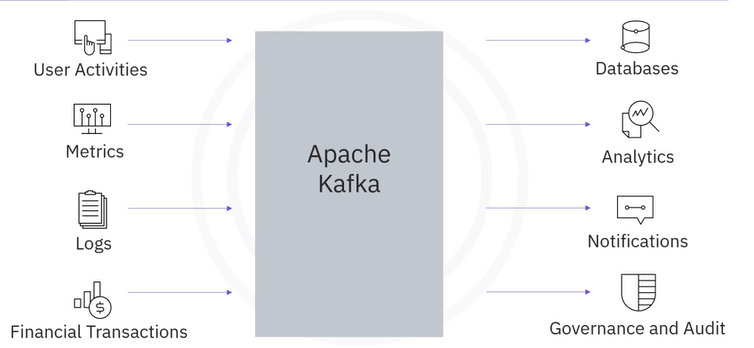

All events will be ingested in Kafka and become available for subscriptions and
consumption, including: 
- further data storage and
movement to other online or offline databases and backups.
- real time processing and analytics including dashboard, machine learning,
AI algorithms
- generating notifications such as email, text
messages, and instant messages
- data governance and auditing to make sure
sensitive data such as bank transactions are complying with regulations.


## Kafka architecture

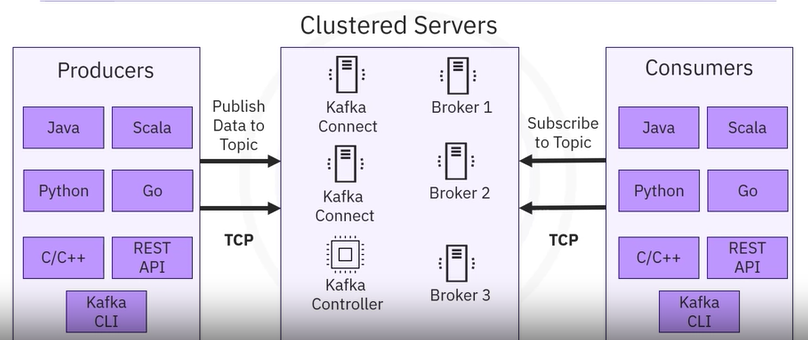

Kafka runs as a cluster of broker servers, acting as the event broker to receive
events from the producers, store the streams of records, and distribute events.

It also has servers that run Kafka Connect to import and
export data as event streams.

Using Kafka controllers, producers send or publish data to the topic, and
the consumers subscribe to the topic to receive data.

Kafka uses a transmission control protocol, TCP based network
communication protocol, to exchange data between clients and servers.

For the client side,
Kafka provides different types of clients such as:
-  Kafka command line interface, CLI - a collection of shell scripts to communicate with the Kafka server,
- several high level programming APIs such as Java, Scala, Python, Go, C, and
C++, rest APIs
- some specific third party clients made by the Kafka community. 

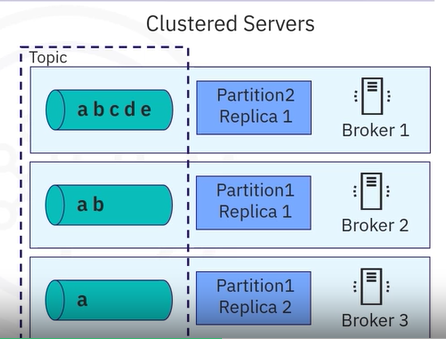

### Key features of Kafka architecture:

- Kafka is a __distribution system__,
which makes it __highly scalable__ to handle high data throughput and concurrency.
- Kafka is __very fast__.
- A Kafka cluster normally has multiple event brokers which can handle event
streaming in parallel.Kafka also divides event storage into multiple partitions and replications,
which makes it __fault-tolerant and highly reliable__.
- Kafka stores the events __permanently__. Thus, event consumption can be done whenever suitable for consumers
without a deadline.

### Event streaming as a service

Deploying a Kafka cluster requires extensive efforts for
tuning infrastructure and consistently adjusting the configurations,
especially for enterprise-level deployments.
Fortunately, several commercial service providers offer an on-demand ESP as
a service to meet your streaming requirements. 

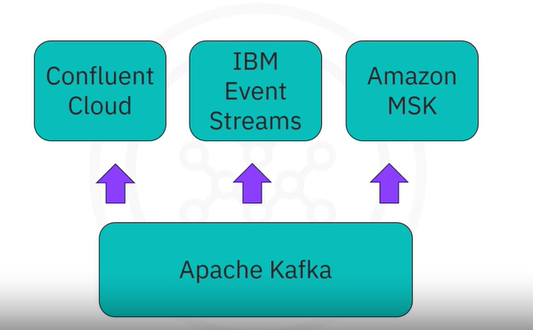

## Building event streaming pipelines using Kafka

At its most basic level, a data pipeline can be seen as an aggregator that takes data from multiple sources and distributes that data to multiple destinations, eliminating the need for multiple bespoke systems. As the data transits the pipeline, it may also be acted upon, essentially shaped based on organizational needs and/or the requirements of a receiving system.

The internals of a data pipeline can be viewed as a series of steps or processes that shape the data in motion as it travels from its source to its destination.

### Organizing data: brokers, topics, partitions and replication

A Kafka cluster contains one or many brokers.

You may think of a Kafka broker as a dedicated server to receive, store,
process, and distribute events.

Brokers are synchronized and
use KRaft controller nodes that use the consensus protocol to manage the Kafka
metadata log that contains information about each change to the cluster metadata.

The diagram gives an example of how the data is organized as topics in the brokers.
- A log_topic and a transaction topic in broker 0, a payment_topic and a gps_topic
in broker 1, and a user_click_topic and user_search_topic in broker 2.
- Each broker contains one or many topics.
You can think of a topic as a database to store specific types of events such as
logs, transactions, and metrics.
- Brokers manage to save published events into topics and
distribute the events to subscribed consumers. 

__Brokers and topics__

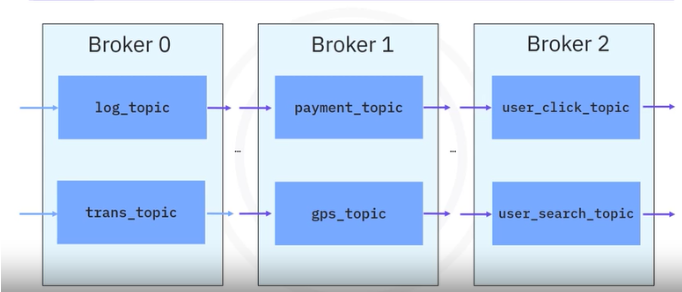

Like many other distribution systems,
Kafka implements the concepts of partitioning and replicating.
- It uses topic partitions and replications to increase fault tolerance and throughput so that event publication and
consumption can be done in parallel with multiple brokers.
- In addition, even if some brokers are down, kafka clients are still able to work
with the target topics replicated in other working brokers.
- For example, a log_topic has been separated into two partitions
(0,1) and a user topic has been separated into two partitions
(0,1) and each topic partitioned is duplicated into two replications and
stored in different brokers.


__Partitions and replications__

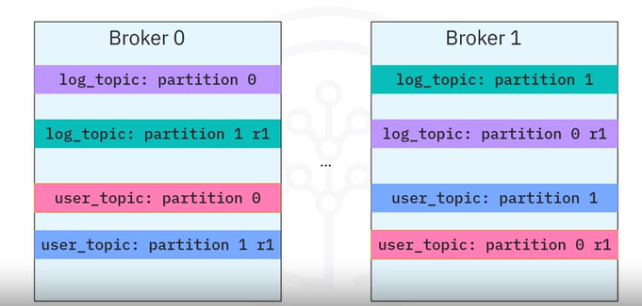

### Kafka topic CLI (command line interface)

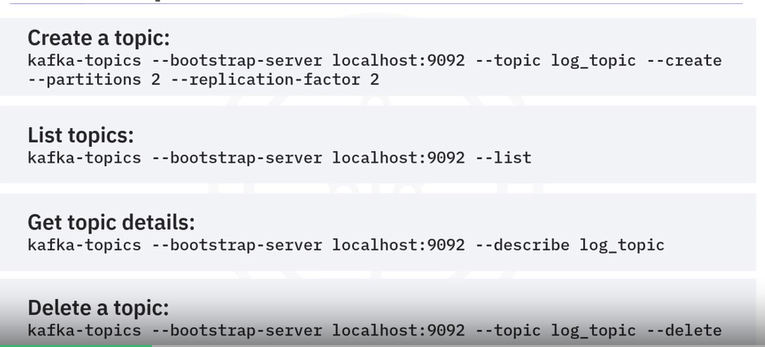

### Kafka producers

We publish events using Kafka producers.
Features of a Kafka producer: 
- Producers are client applications that publish events to
topic partitions according to the same order as they are published.
- When publishing an event in a Kafka producer,
an event can be optionally associated with a key.
- Events associated with the same key will be published to the same topic partition.
- Events not associated with any key will be published to topic partitions in rotation.


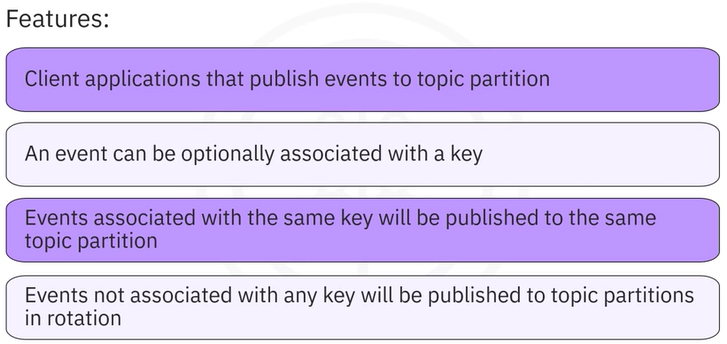

__Kafka producer in action__

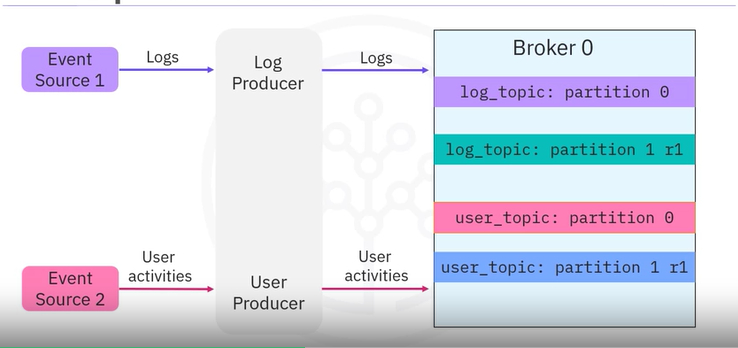

### Kafka producer CLI

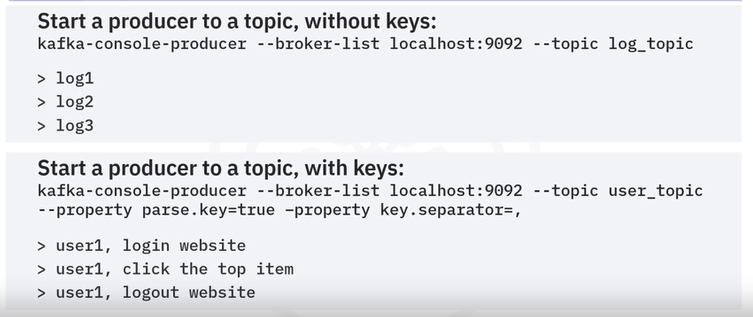

### Kafka consumers

Once events are published and properly stored in topic partitions,
you can create consumers to read them.

Consumers are client applications that can subscribe to topics and
read the stored events.

- Consumers read data from topic partitions in the same order as they are published.
- Consumers also store an offset for each topic partition as the last read position.
With the offset, consumers are guaranteed to read events as they occur.
- A playback is also possible by resetting the offset to zero.
This way, the consumer can read all events in the topic partition from the beginning.
- The event destinations can further read events from Kafka consumers.


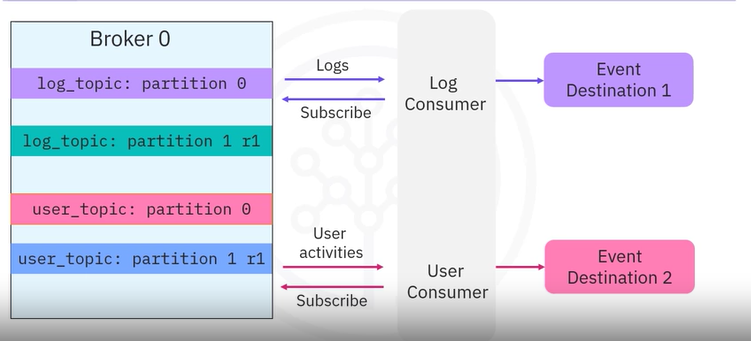

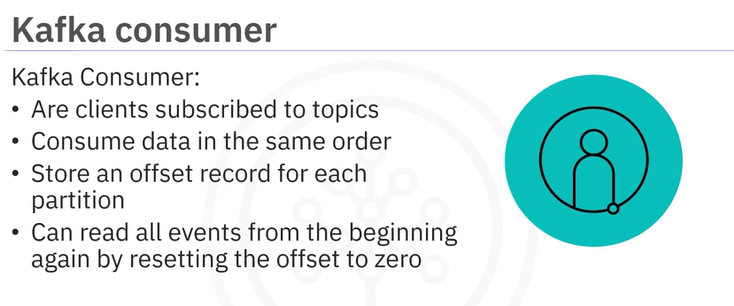

In Kafka, producers and consumers are fully decoupled.
As such, producers don't need to synchronize with consumers, and
after events are stored in topics,
consumers can have independent schedules to consume them. 

### Kafka consumer CLI

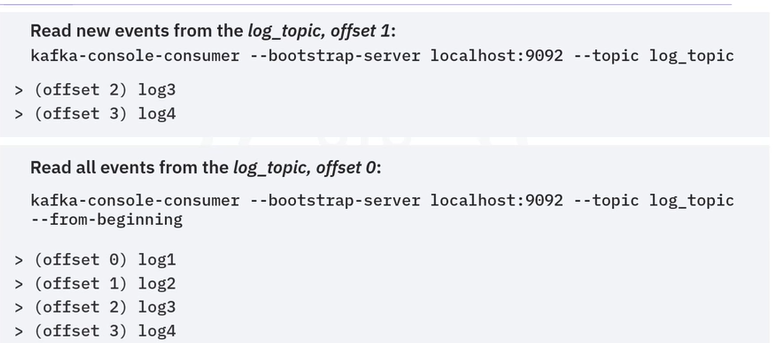

## Example: a weather pipeline

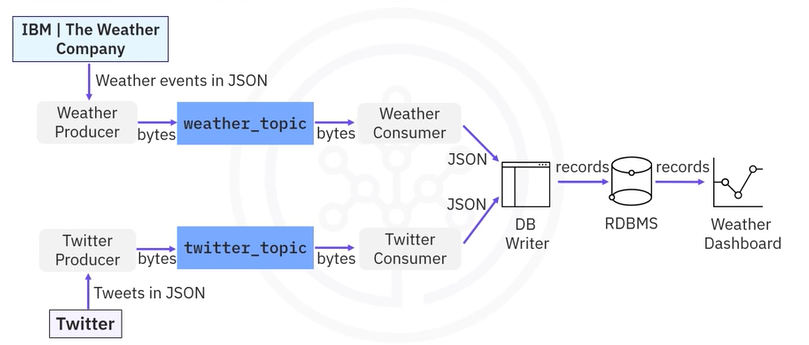

The task:  to collect and analyze weather and Twitter event streams so
that you can correlate how people talk about extreme weather on Twitter.

1. We can use two __event sources__: 
- IBM weather API to obtain real time and
forecasted weather data in JSON format.
- Twitter API to obtain real-time tweets and mentions also in JSON format.

2. To __receive__ weather and Twitter JSON data in Kafka, we create a __weather topic__
and a __Twitter topic__ in a Kafka cluster with some partitions and replications.

3. To __publish__ weather and Twitter JSON data to the two topics,
we need to create a __weather producer__ and a __Twitter producer__.
The event's JSON data will be serialized into bytes and saved in Kafka topics.

4. To __read__ events from the two topics, we need to create a __weather consumer__ and
a __Twitter consumer__.
The bytes stored in Kafka topics will be deserialized into event JSON data.

5. IWe now want to __transport__ the weather and
Twitter event JSON data from the consumers to a __relational database__. We
will use a DB writer to parse those JSON files and create database records,
and then we can write those records into a database using SQL insert statements.

6. Finally, we can __query__ the database records from the relational database and
__visualize and analyze__ them in a dashboard to complete the end-to-end pipeline. 

## Summing up

The core components of Kafka are: 
- __brokers__: the dedicated servers to receive, store, process, and distribute events.
- __topics__: the containers or databases of events.Partitions divide topics into different brokers. Replications duplicate partitions into different brokers.
- __producers__: kafka client applications that publish events into topics.
- __consumers__: Kafka client applications that subscribe to topics and
read events from them.

Kafla __CLI__ types:
- The Kafka-topics CLI manages topics.
T- he Kafka-console-producer CLI manages producers.
- The Kafka-console-consumer manages consumers. 